# Analysis of Covid-19 Delta Variant 
### Group: Group 1
### Team: Avinash Kumar, Vamsi Krishna, Vishwas Narayan
### Project: Digital Tools for Strategic Planning (DOORSTEP)

Import Statements for data analysis using pandas, data manipulation using numpy and plotting the visualizations such as choropleth map, line plots, horizontal barplots using plotly, matplotlib and seaborn.

In [1]:
# Pandas libraries
import pandas as pd
import pandasql as ps
import pandas_profiling as pp
import numpy as np
from collections import OrderedDict
import re

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')
init_notebook_mode(connected=True)
from pandas.plotting import radviz
import plotly.express as plotlybar
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.templates.default = "plotly"
from plotly.subplots import make_subplots
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 


#Imports for matplotlib plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline


#Import for mixed data
from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
random_state = 1234
pd.options.plotting.backend = "plotly"

### Reading the datasets for Delta variant for Germany

In [2]:
variants_df = pd.read_excel('SARS-CoV-2_variants_EU_29072021_GISAID.xlsx',parse_dates=['year_week'])
cases_df = pd.read_excel('daily_cases_deaths_EU_060821.xlsx')
owid_variants_df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/variants/covid-variants.csv')
#owid_variants_df=pd.read_excel('covid-variants.xlsx')

In [3]:
display(variants_df)
display(variants_df.info())

,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,percent_variant
0,Austria,AT,2020-40,GISAID,5152.0,4.0,0.1,True,B.1.1.7,0.0,0.0
1,Austria,AT,2020-40,GISAID,5152.0,4.0,0.1,True,B.1.1.7+E484K,0.0,0.0
2,Austria,AT,2020-40,GISAID,5152.0,4.0,0.1,True,B.1.351,0.0,0.0
3,Austria,AT,2020-40,GISAID,5152.0,4.0,0.1,True,B.1.427/B.1.429,0.0,0.0
4,Austria,AT,2020-40,GISAID,5152.0,4.0,0.1,True,B.1.525,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
23755,Sweden,SE,2021-30,GISAID,3452.0,0.0,0.0,True,C.1.2,0.0,NaN
23756,Sweden,SE,2021-30,GISAID,3452.0,0.0,0.0,True,C.37,0.0,NaN
23757,Sweden,SE,2021-30,GISAID,3452.0,0.0,0.0,True,P.1,0.0,NaN
23758,Sweden,SE,2021-30,GISAID,3452.0,0.0,0.0,True,P.3,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23760 entries, 0 to 23759
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    23742 non-null  object 
 1   country_code               23742 non-null  object 
 2   year_week                  23742 non-null  object 
 3   source                     23742 non-null  object 
 4   new_cases                  23724 non-null  float64
 5   number_sequenced           23742 non-null  float64
 6   percent_cases_sequenced    23724 non-null  float64
 7   valid_denominator          23742 non-null  object 
 8   variant                    23742 non-null  object 
 9   number_detections_variant  23742 non-null  float64
 10  percent_variant            19170 non-null  float64
dtypes: float64(5), object(6)
memory usage: 2.0+ MB


None

In [4]:
display(cases_df)
display(cases_df.info())

,dateRep,year,month,day,cases,deaths,countriesAndTerritories,geoId,popData2020,countryterritoryCode,continentExp
0,08/08/2021,2021,8,8,673,1,Austria,AT,8901064,AUT,Europe
1,07/08/2021,2021,8,7,553,2,Austria,AT,8901064,AUT,Europe
2,06/08/2021,2021,8,6,485,3,Austria,AT,8901064,AUT,Europe
3,05/08/2021,2021,8,5,597,1,Austria,AT,8901064,AUT,Europe
4,04/08/2021,2021,8,4,376,4,Austria,AT,8901064,AUT,Europe
...,...,...,...,...,...,...,...,...,...,...,...
4825,05/03/2021,2021,3,5,4069,14,Sweden,SE,10327589,SWE,Europe
4826,04/03/2021,2021,3,4,4883,19,Sweden,SE,10327589,SWE,Europe
4827,03/03/2021,2021,3,3,4874,19,Sweden,SE,10327589,SWE,Europe
4828,02/03/2021,2021,3,2,6191,23,Sweden,SE,10327589,SWE,Europe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  4830 non-null   object
 1   year                     4830 non-null   int64 
 2   month                    4830 non-null   int64 
 3   day                      4830 non-null   int64 
 4   cases                    4830 non-null   int64 
 5   deaths                   4830 non-null   int64 
 6   countriesAndTerritories  4830 non-null   object
 7   geoId                    4830 non-null   object
 8   popData2020              4830 non-null   int64 
 9   countryterritoryCode     4830 non-null   object
 10  continentExp             4830 non-null   object
dtypes: int64(6), object(5)
memory usage: 415.2+ KB


None

In [5]:
display(owid_variants_df)
display(owid_variants_df.info())

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-12-21,B.1.160,0.0,0.0,93
1,Angola,2020-12-21,B.1.620,0.0,0.0,93
2,Angola,2020-12-21,B.1.258,0.0,0.0,93
3,Angola,2020-12-21,B.1.221,NaN,NaN,93
4,Angola,2020-12-21,B.1.1.302,NaN,NaN,93
...,...,...,...,...,...,...
35024,Zimbabwe,2021-02-08,B.1.621,NaN,NaN,37
35025,Zimbabwe,2021-02-08,S:677P.Pelican,NaN,NaN,37
35026,Zimbabwe,2021-02-08,S:677H.Robin1,NaN,NaN,37
35027,Zimbabwe,2021-02-08,others,0.0,0.0,37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35029 entries, 0 to 35028
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             35029 non-null  object 
 1   date                 35029 non-null  object 
 2   variant              35029 non-null  object 
 3   num_sequences        21831 non-null  float64
 4   perc_sequences       21831 non-null  float64
 5   num_sequences_total  35029 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


None

### Renaming the columns in order to increase the code readibility

In [6]:
cases_df.rename(columns={'dateRep':'date',
                         'countriesAndTerritories':'country',
                         'countryterritoryCode':'country_code',
                         }, inplace=True)

### Converting the date column into dateformat in order to slide the dataframes for further analysis

In [7]:
cases_df['date']=pd.to_datetime(cases_df['date'],format='%d/%m/%Y')
owid_variants_df['date']=pd.to_datetime(owid_variants_df['date'],format='%Y-%m-%d')

### Filtering the dataset for Germany

In [8]:
cases_pt = cases_df.pivot_table(index=['country','date'], values=['cases','deaths'], aggfunc='sum')
germany_grp = cases_pt.groupby('country').get_group('Germany')
germany_cumulative_grp = germany_grp.cumsum(axis=0).reset_index()
germany_cumulative_grp

,country,date,cases,deaths
0,Germany,2021-03-01,2447068,70105
1,Germany,2021-03-02,2451011,70463
2,Germany,2021-03-03,2460030,70881
3,Germany,2021-03-04,2471942,71240
4,Germany,2021-03-05,2482522,71504
...,...,...,...,...
156,Germany,2021-08-04,3777446,91704
157,Germany,2021-08-05,3780985,91730
158,Germany,2021-08-06,3784433,91754
159,Germany,2021-08-07,3787639,91778


### Plot for visualizing daily cases in Germany

It can be observed from the figure that daily coronavirus have started to increase from the month of July 2021

In [9]:
germany_daily_grp = germany_grp.iloc[1:, :].reset_index()
temp = germany_daily_grp.groupby('date')['cases'].sum().reset_index()
temp = temp.melt(id_vars="date", value_vars=['cases'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="date", y="Count", color='Case',
             title='Daily Cases in Germany from March 2021')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

### Plot for visualizing daily deaths in Germany

It can be observed from the figure that daily deaths in Germany started to increase from the month of July 2021

In [10]:
germany_daily_grp = germany_grp.iloc[1:, :].reset_index()
temp = germany_daily_grp.groupby('date')['deaths'].sum().reset_index()
temp = temp.melt(id_vars="date", value_vars=['deaths'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="date", y="Count", color='Case',
             title='Daily Deaths in Germany from March 2021',  color_discrete_sequence = [dth])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

### Plot for visualizing daily cases and deaths in Germany

In [11]:
test = germany_daily_grp[['date','cases','deaths']]
test = test.melt(id_vars='date', value_vars=['cases', 'deaths'],
                 var_name='Variable', value_name='Count')
px.line(test, x='date', y='Count', color='Variable',log_y=True)

### Plot for visualizing total confirmed cases and deaths in Germany on Logarithmic Scale

It can be observed from the two figures that deaths and confirmed cases have started to increase from the month of May 2021

In [12]:
fig = px.bar(germany_cumulative_grp, x="date", y="cases", 
              title="Total Confirmed Cases in Germany (Logarithmic Scale) from March 2021", log_y=True)
fig.show()
fig = px.bar(germany_cumulative_grp, x="date", y="deaths",
              title="Total Confirmed Deaths in Germany (Logarithmic Scale)  from March 2021",log_y=True)
fig.update_traces(marker_color='red')
fig.show()

### Function to plot coronavirus cases on daywise basis on bar plot


In [13]:
def plot_daywise(col, hue):
    fig = px.bar(day_wise, x="date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

### Function to plot coronavirus cases on daywise basis on line plot

In [14]:
def plot_daywise_line(col, hue):
    fig = px.line(day_wise, x="Date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

### Function to plot coronavirus cases on daywise basis on horizontal barplot


In [15]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n), 
                 x=col, y="Country/Region", color='WHO Region',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [16]:
delta_variant_df = variants_df.loc[variants_df['variant'] == 'B.1.617.2']
delta_variant_grp = delta_variant_df.groupby('country').sum().reset_index()
variants_germany_df = variants_df.loc[variants_df['country'] == 'Germany']
variants_germany_grp = variants_df.groupby('variant').mean().reset_index()
variants_germany_pt = variants_germany_df.pivot_table(index=['year_week'],columns=['variant'],values=['percent_variant'],aggfunc=np.sum).reset_index()
top_5_variants = variants_germany_grp.sort_values(by=['percent_variant'],ascending=False).head(5)
delta_variant_germany_df = delta_variant_df.loc[variants_df['country'] == 'Germany']
delta_variant_germany_pt = delta_variant_germany_df.pivot_table(index=['year_week'],values=['number_detections_variant','percent_variant'],aggfunc=np.sum).reset_index()

In [17]:
week18_variant_germany_grp = variants_germany_df.loc[variants_df['year_week'] == '2021-18']
week28_variant_germany_grp = variants_germany_df.loc[variants_df['year_week'] == '2021-28']
display(week18_variant_germany_grp)
display(week28_variant_germany_grp)

,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,percent_variant
8478,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.1.7,8406.0,92.0
8479,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.1.7+E484K,0.0,0.0
8480,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.351,198.0,2.2
8481,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.427/B.1.429,0.0,0.0
8482,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.525,75.0,0.8
8483,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.526,10.0,0.1
8484,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.616,0.0,0.0
8485,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.617,0.0,0.0
8486,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.617.1,18.0,0.2
8487,Germany,DE,2021-18,GISAID,101269.0,9136.0,9.0,True,B.1.617.2,157.0,1.7


,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,percent_variant
8658,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.1.7,26.0,6.4
8659,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.1.7+E484K,0.0,0.0
8660,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.351,0.0,0.0
8661,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.427/B.1.429,0.0,0.0
8662,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.525,0.0,0.0
8663,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.526,0.0,0.0
8664,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.616,0.0,0.0
8665,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.617,0.0,0.0
8666,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.617.1,0.0,0.0
8667,Germany,DE,2021-28,GISAID,8738.0,405.0,4.6,True,B.1.617.2,339.0,83.7


In [18]:
top5_week18_variant_germany_grp = week18_variant_germany_grp.sort_values(by=['percent_variant'],ascending=False).head(5)
top5_week28_variant_germany_grp = week28_variant_germany_grp.sort_values(by=['percent_variant'],ascending=False).head(5)

In [19]:
display(delta_variant_grp)
display(variants_germany_grp)
display(top_5_variants)
display(delta_variant_germany_df)
display(delta_variant_germany_pt)

,country,new_cases,number_sequenced,percent_cases_sequenced,number_detections_variant,percent_variant
0,Austria,611679.0,31835.0,572.5,709.0,133.9
1,Belgium,1012953.0,32616.0,236.9,2624.0,447.1
2,Bulgaria,405093.0,3432.0,84.6,121.0,222.3
3,Croatia,347590.0,5268.0,157.4,246.0,266.5
4,Cyprus,100527.0,91.0,13.8,0.0,0.0
5,Czechia,1609185.0,5298.0,68.8,279.0,313.5
6,Denmark,291848.0,121288.0,2181.4,10510.0,432.1
7,Estonia,130571.0,4160.0,124.5,0.0,0.0
8,Finland,97639.0,11630.0,520.9,383.0,386.7
9,France,5594543.0,44680.0,59.8,2417.0,233.8


,variant,new_cases,number_sequenced,percent_cases_sequenced,number_detections_variant,percent_variant
0,B.1.1.7,24372.080425,540.667172,7.676631,337.898408,40.940939
1,B.1.1.7+E484K,24372.080425,540.667172,7.676631,0.000000,0.000000
2,B.1.351,24372.080425,540.667172,7.676631,10.099318,1.299155
3,B.1.427/B.1.429,24372.080425,540.667172,7.676631,0.103867,0.010798
4,B.1.525,24372.080425,540.667172,7.676631,2.305534,0.225070
5,B.1.526,24372.080425,540.667172,7.676631,0.174375,0.027512
6,B.1.616,24372.080425,540.667172,7.676631,0.028052,0.001878
7,B.1.617,24372.080425,540.667172,7.676631,0.000000,0.000000
8,B.1.617.1,24372.080425,540.667172,7.676631,0.338893,0.037089
9,B.1.617.2,24372.080425,540.667172,7.676631,30.805155,7.034836


,variant,new_cases,number_sequenced,percent_cases_sequenced,number_detections_variant,percent_variant
15,Other,24372.080425,540.667172,7.676631,152.374526,49.322817
0,B.1.1.7,24372.080425,540.667172,7.676631,337.898408,40.940939
9,B.1.617.2,24372.080425,540.667172,7.676631,30.805155,7.034836
2,B.1.351,24372.080425,540.667172,7.676631,10.099318,1.299155
16,P.1,24372.080425,540.667172,7.676631,5.640637,0.956620


,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,percent_variant
7929,Germany,DE,2020-40,GISAID,15287.0,158.0,1.0,True,B.1.617.2,0.0,0.0
7947,Germany,DE,2020-41,GISAID,24712.0,186.0,0.8,True,B.1.617.2,0.0,0.0
7965,Germany,DE,2020-42,GISAID,40968.0,167.0,0.4,True,B.1.617.2,0.0,0.0
7983,Germany,DE,2020-43,GISAID,71567.0,173.0,0.2,True,B.1.617.2,0.0,0.0
8001,Germany,DE,2020-44,GISAID,107161.0,222.0,0.2,True,B.1.617.2,0.0,0.0
8019,Germany,DE,2020-45,GISAID,126841.0,199.0,0.2,True,B.1.617.2,0.0,0.0
8037,Germany,DE,2020-46,GISAID,129459.0,257.0,0.2,True,B.1.617.2,0.0,0.0
8055,Germany,DE,2020-47,GISAID,127806.0,277.0,0.2,True,B.1.617.2,0.0,0.0
8073,Germany,DE,2020-48,GISAID,124736.0,314.0,0.3,True,B.1.617.2,0.0,0.0
8091,Germany,DE,2020-49,GISAID,129785.0,377.0,0.3,True,B.1.617.2,0.0,0.0


,year_week,number_detections_variant,percent_variant
0,2020-40,0.0,0.0
1,2020-41,0.0,0.0
2,2020-42,0.0,0.0
3,2020-43,0.0,0.0
4,2020-44,0.0,0.0
5,2020-45,0.0,0.0
6,2020-46,0.0,0.0
7,2020-47,0.0,0.0
8,2020-48,0.0,0.0
9,2020-49,0.0,0.0


### Plot for visualzing all the covid variants of concern

It can be seen that there is a significant increase in the delta variant (B.1.617.2) in the last few months in Germany

In [20]:
variant_plot_df = variants_germany_pt.set_index('year_week')
variant_plot_df.columns = variant_plot_df.columns.droplevel(0)
variant_plot_df = variant_plot_df.reset_index()
variant_plot_df['date'] = pd.to_datetime(variant_plot_df['year_week']+'0',format='%Y-%W%w')
variant_plot_df.plot(x=variant_plot_df.date,y=['B.1.1.7','B.1.1.7+E484K','B.1.617.1','B.1.617.2','B.1.617.3','P.1'],kind='line')

### Pie chart to visualize COVID-19 variants distribution by week 18

We can see from the figure that delta variant was not prominent in the first 18 weeks of this year

In [21]:
pie_vis1 = go.Pie(values=top5_week18_variant_germany_grp['percent_variant'].values,
                labels=top5_week18_variant_germany_grp['variant'].values,
                hole=0.3
               )
 

layout = go.Layout(title={        
        'text': "<b>Week-18 COVID-19 variants Percentage Distribution</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig = go.Figure(data=[pie_vis1], layout=layout)
fig.update_traces(marker=dict(colors=['light_blue', 'purple', 'grey','red','orange']))
py.iplot(fig)

### Pie chart to visualize COVID-19 variants distribution by week 28

It is noteable that share of delta varaint has increased by week 28

In [22]:
pie_vis2 = go.Pie(values=top5_week28_variant_germany_grp['percent_variant'].values,
                labels=top5_week28_variant_germany_grp['variant'].values,
                hole=0.3
               )
 

layout = go.Layout(title={        
        'text': "<b>Week-28 COVID-19 variants Percentage Distribution</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig = go.Figure(data=[pie_vis2], layout=layout)
fig.update_traces(marker=dict(colors=['red', 'green', 'light_blue','grey','cyan']))
py.iplot(fig)

### Plot of viusalizing rise of delta variants in Europe

We can observe from the figure that most of the Eurpeans countries have been reporting delta varaint cases. Germany is having the highest number of delta variant cases among all the European countries

In [23]:
fig = px.choropleth(delta_variant_grp, locations="country", 
                    locationmode='country names', color="number_detections_variant", 
                    hover_name="country", hover_data=['number_sequenced'],range_color=[1,4000], 
                    color_continuous_scale='portland', 
                    title='Rise of Delta Variant Cases in the European Union', scope='europe', height=800)
# fig.update()
fig.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')
from pandas import DatetimeIndex
from pandas import Timestamp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn import svm
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
#from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py 
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.6f' % x)

import wget

### Reading datasets for time series analysis

In [25]:
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']


for url in urls:
    filename = wget.download(url)


conf_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recv_df = pd.read_csv('time_series_covid19_recovered_global.csv')   

dates = conf_df.columns[4:]

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Confirmed')
deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Deaths')
recv_df_long = recv_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Recovered')

100% [............................................................................] 769508 / 769508

100% [............................................................................] 689420 / 689420

### Concatenating the datasets to get the deaths and recovered cases in one single dataframe

In [26]:
covid = pd.concat([conf_df_long, deaths_df_long['Deaths'],recv_df_long['Recovered']], axis=1, sort=False)
covid["Date"]=pd.to_datetime(covid["Date"])
covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.000000
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.000000
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.000000
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.000000
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.000000
...,...,...,...,...,...,...,...,...
158467,NaN,Vietnam,14.058324,108.277199,2021-08-11,241543,4487,NaN
158468,NaN,West Bank and Gaza,31.952200,35.233200,2021-08-11,318435,3615,NaN
158469,NaN,Yemen,15.552727,48.516388,2021-08-11,7213,1392,NaN
158470,NaN,Zambia,-13.133897,27.849332,2021-08-11,201342,3509,NaN


### Grouping the datasets based on date and aggregating the confirmed, recovered and deaths cases

In [27]:
datewise=covid.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,557,30.000000,17
2020-01-23,655,32.000000,18
2020-01-24,941,41.000000,26
2020-01-25,1433,87.000000,42
2020-01-26,2118,66.000000,56
...,...,...,...
2021-08-07,202290946,0.000000,4286932
2021-08-08,202728255,0.000000,4294361
2021-08-09,203384856,0.000000,4302961


### Filtering the dataset for Germany

In [28]:
bd_data=covid[covid["Country/Region"]=="Germany"]
datewise_bd=bd_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_bd.iloc[-1])
print("Total Active Cases: ",datewise_bd["Confirmed"].iloc[-1]-datewise_bd["Recovered"].iloc[-1]-datewise_bd["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_bd["Recovered"].iloc[-1]+datewise_bd["Deaths"].iloc[-1])
datewise_bd

Confirmed   3808838.000000
Recovered         0.000000
Deaths        91841.000000
Name: 2021-08-11 00:00:00, dtype: float64
Total Active Cases:  3716997.0
Total Closed Cases:  91841.0


,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,0,0.000000,0
2020-01-23,0,0.000000,0
2020-01-24,0,0.000000,0
2020-01-25,0,0.000000,0
2020-01-26,0,0.000000,0
...,...,...,...
2021-08-07,3795609,0.000000,91789
2021-08-08,3797849,0.000000,91791
2021-08-09,3800069,0.000000,91810


In [29]:
datewise_bd=datewise_bd[500:566]

In [30]:
datewise_bd["Days Since"]=datewise_bd.index-datewise_bd.index[0]
datewise_bd["Days Since"]=datewise_bd["Days Since"].dt.days

train_ml=datewise_bd.iloc[:int(datewise_bd.shape[0]*0.85)]
valid_ml=datewise_bd.iloc[int(datewise_bd.shape[0]*0.85):]

valid_ml

,Confirmed,Recovered,Deaths,Days Since
Date,,,,
2021-07-31,3776724,0.000000,91666,56
2021-08-01,3778277,0.000000,91666,57
2021-08-02,3779797,0.000000,91685,58
2021-08-03,3782344,0.000000,91710,59
2021-08-04,3786003,0.000000,91736,60
2021-08-05,3789460,0.000000,91761,61
2021-08-06,3792848,0.000000,91785,62
2021-08-07,3795609,0.000000,91789,63
2021-08-08,3797849,0.000000,91791,64


### Defining days and ploynomial degress for machine learning 

In [31]:
day=8
poly_degree_pr=3
svm_degree=5
poly_degree_polymlp=3

### Using Bayesian ploynomial to fit and transform the training data

In [32]:
bayesian_poly = PolynomialFeatures(degree=4)
bayesian_poly_train_ml = bayesian_poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
bayesian_poly_valid_ml = bayesian_poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
bayesian_poly_datewise_ml = bayesian_poly.fit_transform(np.array(datewise_bd["Days Since"]).reshape(-1,1))

### Defining font sizes for axes

In [33]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Plot for visualizing datewise growth factor of different types of cases

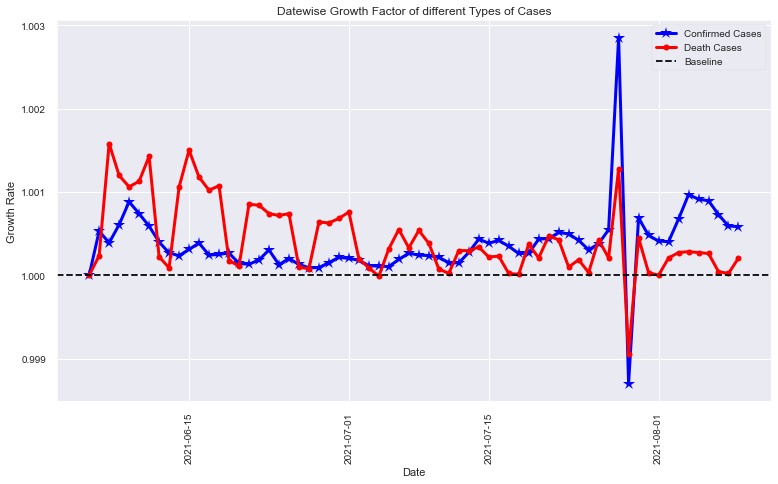

In [34]:
bd_increase_confirm=[]
bd_increase_deaths=[]

for i in range(datewise_bd.shape[0]-1):
    bd_increase_confirm.append(((datewise_bd["Confirmed"].iloc[i+1])/datewise_bd["Confirmed"].iloc[i]))
    bd_increase_deaths.append(((datewise_bd["Deaths"].iloc[i+1])/datewise_bd["Deaths"].iloc[i]))
bd_increase_confirm.insert(0,1)
bd_increase_deaths.insert(0,1)

gplot=plt.figure(figsize=(12.8,7))
plt.style.use('seaborn-notebook')
plt.plot(datewise_bd.index,bd_increase_confirm,label="Confirmed Cases",color='blue',linewidth=3, marker='*', markerfacecolor='blue', markersize=12)
plt.plot(datewise_bd.index,bd_increase_deaths,label="Death Cases",color='red',linewidth=3, marker='.', markerfacecolor='red', markersize=12)
plt.axhline(1,linestyle='--',color="black",label="Baseline")

plt.xticks(rotation=90)
plt.title("Datewise Growth Factor of different Types of Cases")

plt.xlabel("Date")
plt.ylabel("Growth Rate")

plt.legend(loc='upper right', bbox_to_anchor=(1.00, 1.00))

In [35]:
g_fig = px.line(datewise_bd, x=datewise_bd.index, y=bd_increase_confirm)
g_fig.add_scatter(x=datewise_bd.index, y=bd_increase_deaths) 
g_fig.show()

### Plot for visualizing the predicted number of coronavirus cases in next few days in Germany

In [36]:
def plot_result(data_d,new_date_time_index, forecast, gcolor, gcase, gtitle):
    plt.style.use('seaborn-notebook')
    plt.plot(data_d,label="Actual "+gcase,color=gcolor, linestyle='solid', linewidth = 2, marker='.', markerfacecolor=gcolor, markersize=12)
    plt.plot(new_date_time_index,forecast,label="Predicted "+gcase,color='black', linestyle='dashed',marker='.', linewidth = 2, markerfacecolor='black',markersize=12)
    #plt.xlabel('Date Time')
    #plt.ylabel(gcase)
    #plt.title(gtitle)

In [37]:
def new_forecast(prediction,new_prediction,new_date):
    
    forecast=np.concatenate((prediction,new_prediction))

    new_ar = []

    for single_timestamp in datewise_bd.index:
        new_ar.append(pd.to_datetime(single_timestamp))

    for single_timestamp in new_date:
        new_ar.append(pd.to_datetime(single_timestamp))

    new_date_time_index = DatetimeIndex(new_ar, dtype='datetime64[ns]', name='Date', freq=None)

    return (forecast,new_date_time_index)

In [38]:
def date_generation(n):
    new_date=[]
    new_prediction_holt=[]
    for i in range(1,n):
        new_date.append(datewise_bd.index[-1]+timedelta(days=i))

    new_ar = []
  
    for single_timestamp in new_date:
        new_ar.append(pd.to_datetime(single_timestamp))
    new_date_time_index = DatetimeIndex(new_ar, dtype='datetime64[ns]', name='Date', freq=None)
    return (new_date_time_index)

In [39]:
def result_head_conf(x):
    df1=datewise_bd["Confirmed"].head()
    df2=pd.DataFrame(x).head()
    frames1=[df1,df2]
    result = pd.concat(frames1)
    print(result)  

def result__conf(x):
    df1=datewise_bd["Confirmed"].head()
    df2=pd.DataFrame(x).head()
    frames1=[df1,df2]
    result = pd.concat(frames1)
    print(result)

In [40]:
def eval_reg(y,y_p):
    print("Mean Absolute Error: ",mean_absolute_error(y,y_p))
    print("R2-Squared:", r2_score(y,y_p))

In [41]:
def  interactive_graph(index_c,forecast_c, index_d,forecast_d):
    fig = px.line(datewise_bd, x=index_c, y=forecast_c)
    fig.add_scatter(x=index_c, y=datewise_bd['Confirmed']) 

    fig1 = px.line(datewise_bd, x=index_d, y=forecast_d)
    fig1.add_scatter(x=index_d, y=datewise_bd['Deaths']) 

    fig.show()
    fig1.show()

# Linear Regression Model for Short-Term Forecasting

In [42]:
def linearRegression_covid_19(train_d,valid_d,data_d,case):
    model_scores=[]
   
    lin_reg=LinearRegression(normalize=True)
    lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_d).reshape(-1,1))

    print(case)

    prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
    #print("Valid: ",prediction_valid_linreg)
    model_scores.append(np.sqrt(mean_squared_error(valid_d,prediction_valid_linreg)))
    print("RMSE for Linear Regression: ",model_scores)
    
    eval_reg(valid_d,prediction_valid_linreg)
    
    
    prediction_linreg=lin_reg.predict(np.array(datewise_bd["Days Since"]).reshape(-1,1))
    #print("All: ",prediction_linreg[21:25])
    
    #model_scores1=[]
    #model_scores1.append(np.sqrt(mean_squared_error(valid_d,prediction_linreg[21:25])))
    #print("RMSE for LR: ", model_scores1) 



    new_date=[]
    new_prediction_lr=[]

    for i in range(1,day):
        new_date.append(datewise_bd.index[-1]+timedelta(days=i))
        new_prediction_lr.append(lin_reg.predict(np.array(datewise_bd["Days Since"].max()+i).reshape(-1,1))[0])

    forecast_lr, new_date_time_index =new_forecast(prediction_linreg,new_prediction_lr,new_date)
 
    #plot_result(data_d,new_date_time_index, forecast_lr,'blue', case,'Linear Regression Prediction')

    return (forecast_lr, new_date_time_index,model_scores)

In [43]:
print(valid_ml['Days Since'])

Date
2021-07-31    56
2021-08-01    57
2021-08-02    58
2021-08-03    59
2021-08-04    60
2021-08-05    61
2021-08-06    62
2021-08-07    63
2021-08-08    64
2021-08-09    65
Name: Days Since, dtype: int64


Confirmed Cases
RMSE for Linear Regression:  [16392.620875971497]
Mean Absolute Error:  15536.218796992349
R2-Squared: -3.12749673319614
Death Cases
RMSE for Linear Regression:  [428.04749089867846]
Mean Absolute Error:  422.7120300751907
R2-Squared: -66.21152069985004


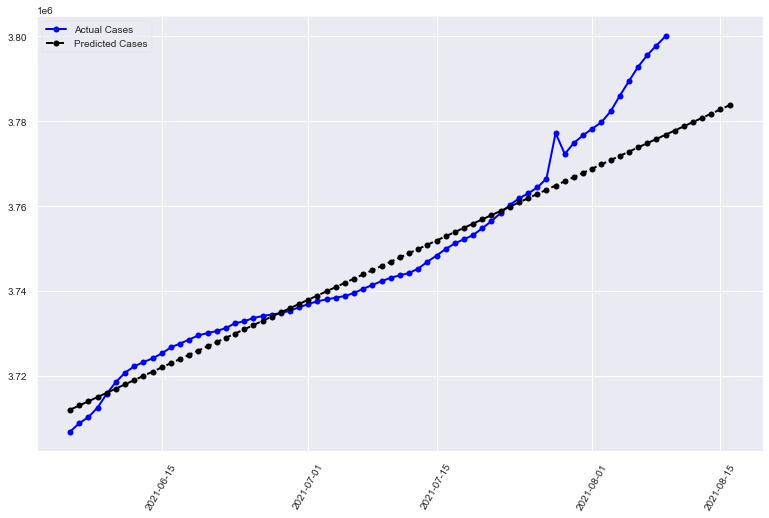

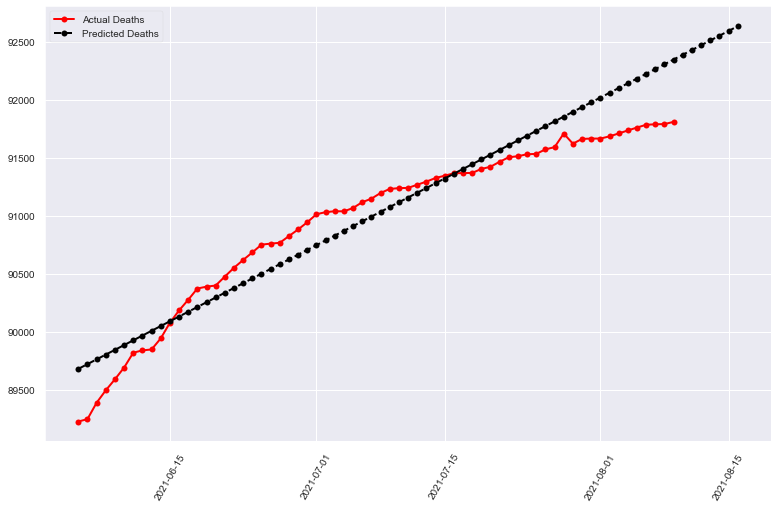

Execution Time 0.625


In [44]:
t1 = time.process_time()

forecast_lr_c, new_date_time_index_c, model_score_lm_c = linearRegression_covid_19(train_ml["Confirmed"],valid_ml["Confirmed"],datewise_bd["Confirmed"],'Confirmed Cases')
forecast_lr_d, new_date_time_index_d, model_score_lm_d = linearRegression_covid_19(train_ml["Deaths"],valid_ml["Deaths"],datewise_bd["Deaths"],'Death Cases')


plt.figure(figsize=(13,8))
plot_result(datewise_bd["Confirmed"],new_date_time_index_c, forecast_lr_c,'blue','Cases', 'Linear Regression')
# plot_result(datewise_bd["Deaths"],new_date_time_index_d, forecast_lr_d,'red','Death Cases', 'Linear Regression')
plt.xticks(rotation=60)
plt.legend(frameon=True) 
plt.show()

plt.figure(figsize=(13,8))
# plot_result(datewise_bd["Confirmed"],new_date_time_index_c, forecast_lr_c,'blue','Confirmed Cases', 'Linear Regression')
plot_result(datewise_bd["Deaths"],new_date_time_index_d, forecast_lr_d,'red','Deaths', 'Linear Regression')
plt.xticks(rotation=60)
plt.legend(frameon=True) 
plt.show() 

elapsed_time_lr = time.process_time() - t1

print("Execution Time", elapsed_time_lr)

# Polynomial Regression Model for Short-Term Forecasting

In [45]:
def PolyRegression_covid_19(number_of_degree,train_d,valid_d,data_d,case):

    poly = PolynomialFeatures(degree=number_of_degree)
    poly_train_ml = poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
    poly_valid_ml = poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
    poly_datewise_ml = poly.fit_transform(np.array(datewise_bd["Days Since"]).reshape(-1,1))
   
    model_scores=[]

    lin_reg=LinearRegression(normalize=True)
    lin_reg.fit(poly_train_ml,np.array(train_d).reshape(-1,1))

    print(case)
    
    prediction_valid_linreg=lin_reg.predict(poly_valid_ml)
    model_scores.append(np.sqrt(mean_squared_error(valid_d,prediction_valid_linreg)))
    print("RMSE for Polynomial Regression: ",model_scores)

    eval_reg(valid_d,prediction_valid_linreg) 

    prediction_linreg=lin_reg.predict(poly_datewise_ml)

    #model_scores1=[]
    #model_scores1.append(np.sqrt(mean_squared_error(valid_d,prediction_linreg[21:25])))
    #print("RMSE for PR: ", model_scores1) 

    new_date=[]
    new_prediction_lr=[]

    for i in range(1,day):
        new_date.append(datewise_bd.index[-1]+timedelta(days=i))
        poly_c=poly.fit_transform(np.array(datewise_bd["Days Since"].max()+i).reshape(-1,1))
        new_prediction_lr.append(lin_reg.predict(poly_c)[0]) 

    forecast_lr, new_date_time_index =new_forecast(prediction_linreg,new_prediction_lr,new_date)
    
    
    #plot_result(data_d,new_date_time_index, forecast_lr,'blue', case,'Polynomial Regression Prediction')

    return (forecast_lr, new_date_time_index, model_scores)

In [46]:
train_ml['Days Since']
valid_ml['Days Since']

Date
2021-07-31    56
2021-08-01    57
2021-08-02    58
2021-08-03    59
2021-08-04    60
2021-08-05    61
2021-08-06    62
2021-08-07    63
2021-08-08    64
2021-08-09    65
Name: Days Since, dtype: int64

Confirmed Cases
RMSE for Polynomial Regression:  [3580.7039576962643]
Mean Absolute Error:  3442.8343521113975
R2-Squared: 0.8030632433488838
Death Cases
RMSE for Polynomial Regression:  [109.73704532377224]
Mean Absolute Error:  99.47744512541249
R2-Squared: -3.417396020084311


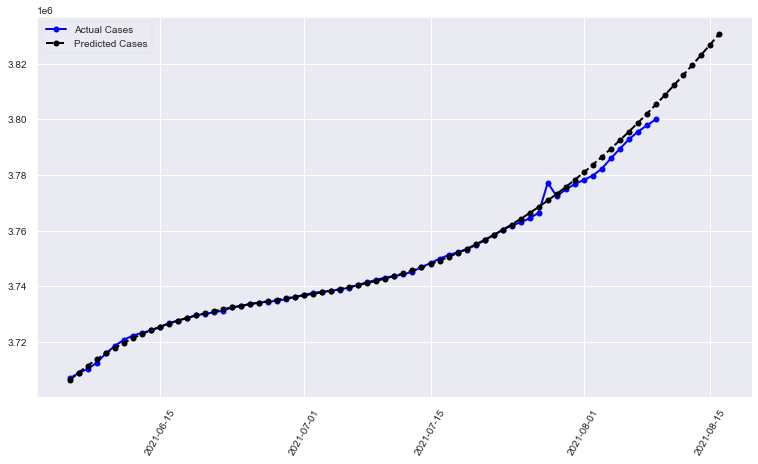

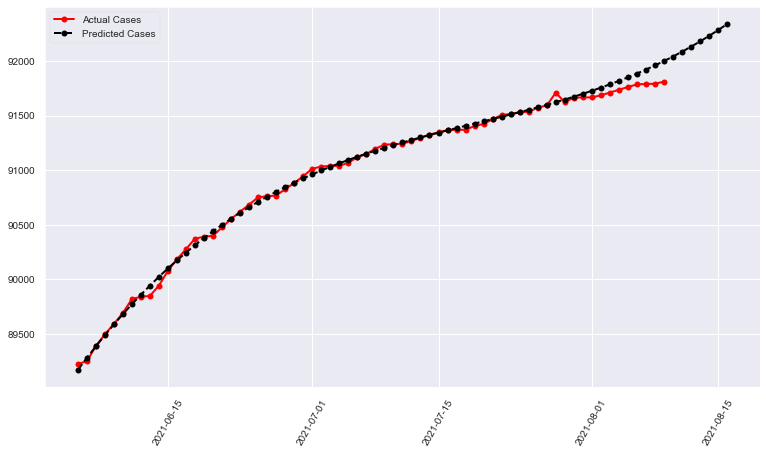

Execution Time: 0.625


In [47]:
t221 = time.process_time()

forecast_poly_lr_c, new_date_time_index_c, model_score_poly_c = PolyRegression_covid_19(4,train_ml["Confirmed"],valid_ml["Confirmed"],datewise_bd["Confirmed"],'Confirmed Cases')
forecast_poly_lr_d, new_date_time_index_d, model_score_poly_d = PolyRegression_covid_19(3,train_ml["Deaths"],valid_ml["Deaths"],datewise_bd["Deaths"],'Death Cases')

plt.figure(figsize=(12.8,7))
plot_result(datewise_bd["Confirmed"],new_date_time_index_c, forecast_poly_lr_c,'blue','Cases', 'Linear Regression')
#plot_result(datewise_bd["Deaths"],new_date_time_index_d, forecast_poly_lr_d,'red','Death Cases', 'Linear Regression') 
plt.xticks(rotation=60)
plt.legend(frameon=True)
plt.show() 

plt.figure(figsize=(12.8,7))
#plot_result(datewise_bd["Confirmed"],new_date_time_index_c, forecast_poly_lr_c,'blue','Confirmed Cases', 'Linear Regression')
plot_result(datewise_bd["Deaths"],new_date_time_index_d, forecast_poly_lr_d,'red','Cases', 'Linear Regression') 
plt.xticks(rotation=60)
plt.legend(frameon=True)
plt.show() 

elapsed_time_poly_lr = time.process_time() - t221

print("Execution Time:", elapsed_time_poly_lr)



Confirmed Cases
RMSE for Polynomial Regression:  [3580.7039576962643]
Mean Absolute Error:  3442.8343521113975
R2-Squared: 0.8030632433488838


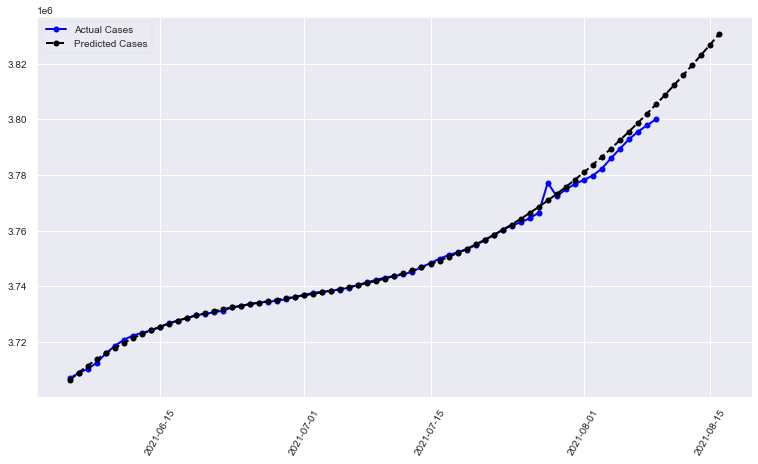

Execution Time: 0.265625


In [48]:
t21 = time.process_time()
forecast_poly_lr_c, new_date_time_index_c, model_score_poly_c = PolyRegression_covid_19(4,train_ml["Confirmed"],valid_ml["Confirmed"],datewise_bd["Confirmed"],'Confirmed Cases')

plt.figure(figsize=(12.8,7))
plot_result(datewise_bd["Confirmed"],new_date_time_index_c, forecast_poly_lr_c,'blue','Cases', 'Linear Regression')
#plot_result(datewise_bd["Deaths"],new_date_time_index_d, forecast_poly_lr_d,'red','Death Cases', 'Linear Regression') 
plt.xticks(rotation=60)
plt.legend(frameon=True)
plt.show()

elapsed_time_poly_lr = time.process_time() - t21

print("Execution Time:", elapsed_time_poly_lr)

Death Cases
RMSE for Polynomial Regression:  [109.73704532377224]
Mean Absolute Error:  99.47744512541249
R2-Squared: -3.417396020084311


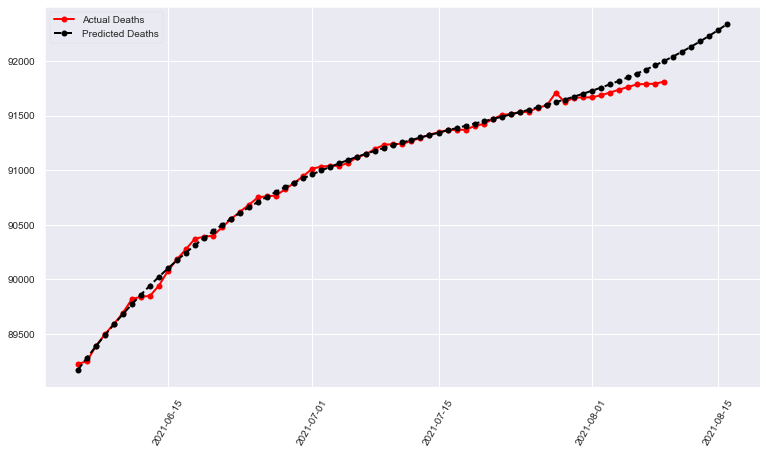

Execution Time: 0.28125


In [49]:
t22 = time.process_time()

forecast_poly_lr_d, new_date_time_index_d, model_score_poly_d = PolyRegression_covid_19(3,train_ml["Deaths"],valid_ml["Deaths"],datewise_bd["Deaths"],'Death Cases')

plt.figure(figsize=(12.8,7))
#plot_result(datewise_bd["Confirmed"],new_date_time_index_c, forecast_poly_lr_c,'blue','Confirmed Cases', 'Linear Regression')
plot_result(datewise_bd["Deaths"],new_date_time_index_d, forecast_poly_lr_d,'red','Deaths', 'Linear Regression') 
plt.xticks(rotation=60)
plt.legend(frameon=True)
plt.show() 

elapsed_time_poly_lr = time.process_time() - t22

print("Execution Time:", elapsed_time_poly_lr)

# Support Vector Regression Model for Short-Term Forecasting

In [50]:
def SVRegression_covid_19(number_of_degree,train_d,valid_d,data_d,case):

    model_scores=[]

    svm=SVR(shrinking=True, kernel='poly',gamma=0.1, epsilon=0.1,degree=number_of_degree, C=10)
    svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_d).reshape(-1,1))
    
    prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
    model_scores.append(np.sqrt(mean_squared_error(valid_d,prediction_valid_svm)))
    print("RMSE for Support Vector Regression: ",model_scores)

    eval_reg(valid_d,prediction_valid_svm)
    

    prediction_svm=svm.predict(np.array(datewise_bd["Days Since"]).reshape(-1,1))

    #model_scores1=[]
    #model_scores1.append(np.sqrt(mean_squared_error(valid_d,prediction_svm[21:25])))
    #print("RMSE for SVM: ", model_scores1) 

    

    new_date=[]
    new_prediction_svm=[]

    for i in range(1,day):
        new_date.append(datewise_bd.index[-1]+timedelta(days=i))
        new_prediction_svm.append(svm.predict(np.array(datewise_bd["Days Since"].max()+i).reshape(-1,1))[0]) 
 

    forecast_svm, new_date_time_index =new_forecast(prediction_svm,new_prediction_svm,new_date)

    return (forecast_svm, new_date_time_index, model_scores)

RMSE for Support Vector Regression:  [2157.5455901622677]
Mean Absolute Error:  1986.6799151316286
R2-Squared: 0.9284993629193066
RMSE for Support Vector Regression:  [521.8861629931441]
Mean Absolute Error:  507.02893319012367
R2-Squared: -98.91055582306768


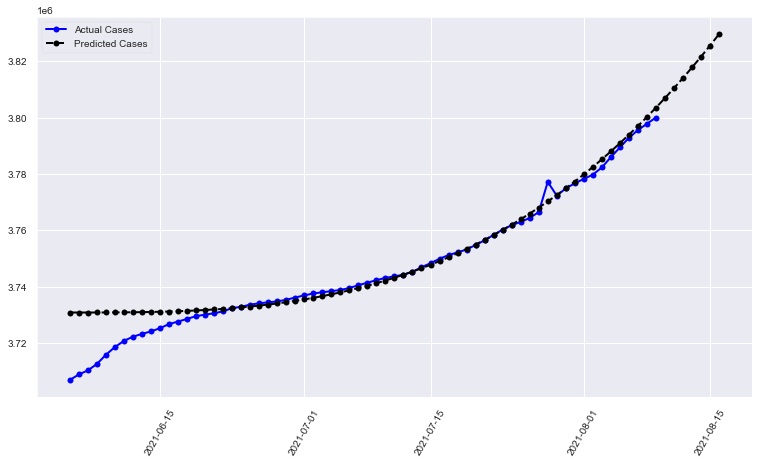

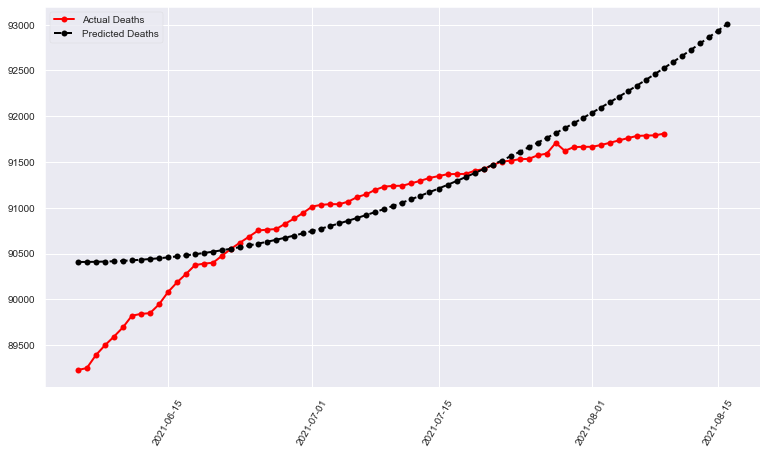

Execution Time 0.859375


In [51]:
t3 = time.process_time()

forecast_svm_c, new_date_time_index_c, model_score_svm_c = SVRegression_covid_19(3,train_ml["Confirmed"],valid_ml["Confirmed"],datewise_bd["Confirmed"],'Confirmed Cases')
forecast_svm_d, new_date_time_index_d, model_score_svm_d = SVRegression_covid_19(2,train_ml["Deaths"],valid_ml["Deaths"],datewise_bd["Deaths"],'Deaths Cases')

plt.figure(figsize=(12.8,7))
plot_result(datewise_bd["Confirmed"],new_date_time_index_c, forecast_svm_c,'blue','Cases', 'Support Vector Regression')
#plot_result(datewise_bd["Deaths"],new_date_time_index_d, forecast_svm_d,'red','Cases', 'Support Vector Regression')
plt.xticks(rotation=60)
plt.legend(frameon=True) 
plt.show()

plt.figure(figsize=(12.8,7))
#plot_result(datewise_bd["Confirmed"],new_date_time_index_c, forecast_svm_c,'blue','Cases', 'Support Vector Regression')
plot_result(datewise_bd["Deaths"],new_date_time_index_d, forecast_svm_d,'red','Deaths', 'Support Vector Regression')
plt.xticks(rotation=60)
plt.legend(frameon=True) 
plt.show()

elapsed_time_svm = time.process_time() - t3


print("Execution Time", elapsed_time_svm)

In [52]:
interactive_graph(new_date_time_index_c,forecast_svm_c,new_date_time_index_d,forecast_svm_d)

# SEIR Model for COVID19 forecasting in Germany

*[Compartmental models in epidemiology - SEIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model)
* [SEIR Great APP](http://gabgoh.github.io/COVID/index.html)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tqdm.notebook import tqdm
from scipy.integrate import solve_ivp
import numpy
import datetime
from datetime import timedelta
import plotly.express as plotlybar
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

## SEIR Model function
* Function From [SEIR Great APP](http://gabgoh.github.io/COVID/index.html)
![image.png](https://upload.wikimedia.org/wikipedia/commons/3/3d/SEIR.PNG)
* S ==> Susceptible : number of susceptible
* E ==> Expose : number of expose
* I ==> Infectious : number of infectious
* R ==> Recovered or Removed : number recovered (or immune) individuals. 
* We have S + E + I + R = N, this is only constant because of the (degenerate) assumption that birth and death rates are equal, N is country population.

Susceptible → Exposed → Infected → Removed, Differential Function as below (from [SEIR Great APP](http://gabgoh.github.io/COVID/index.html)): 
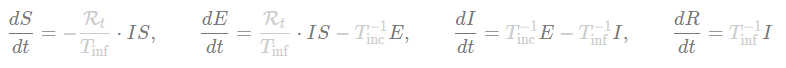
We need to solve the Differential equation to find the S,E,I,R, but what is **"R_t"**, **"T_inf"**, **"T_inc"** and how can we define those variable?
* R_0 & R_t ==> [Reproduction number](https://en.wikipedia.org/wiki/Basic_reproduction_number), The definition describes the state where no other individuals are infected or immunized (naturally or through vaccination)
* T_inf ==> Average duration of the infection, 1/T_inf can be treat as individual experiences one recovery in D units of time.
* T_inc ==> Average incubation period, Many paper and article define as 5.1 ([reference](https://www.ncbi.nlm.nih.gov/pubmed/32150748), [reference2](https://www.worldometers.info/coronavirus/coronavirus-incubation-period/))


In [54]:
# Susceptible equation
def dS_dt(S, I, R_t, T_inf):
    return -(R_t / T_inf) * I * S

# Exposed equation
def dE_dt(S, E, I, R_t, T_inf, T_inc):
    return (R_t / T_inf) * I * S - (T_inc**-1) * E

# Infected equation
def dI_dt(I, E, T_inc, T_inf):
    return (T_inc**-1) * E - (T_inf**-1) * I

# Recovered/Remove/deceased equation
def dR_dt(I, T_inf):
    return (T_inf**-1) * I

def SEIR_model(t, y, R_t, T_inf, T_inc):
    
    if callable(R_t):
        reproduction = R_t(t)
    else:
        reproduction = R_t
        
    S, E, I, R = y
    
    S_out = dS_dt(S, I, reproduction, T_inf)
    E_out = dE_dt(S, E, I, reproduction, T_inf, T_inc)
    I_out = dI_dt(I, E, T_inc, T_inf)
    R_out = dR_dt(I, T_inf)
    
    return [S_out, E_out, I_out, R_out]

## Let's try simple SEIR model on Germany
* Already defined R0, T_inf, T_inc. 
* Compare invention and non-invention condition on SEIR model.

### Load dataset (ComfirmedCase of Germany)

In [55]:
train = pd.read_csv('train_DEU.csv')
test = pd.read_csv('test_DEU.csv')
# train['Date_datetime'] = train['Date'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d')))
train['Date_datetime'] = pd.to_datetime(train['Date'],format='%d-%m-%Y')

### Load populations of Germany

In [56]:
pop_info = pd.read_csv('population_data.csv')
country_pop = pop_info.query('Type == "Country/Region"')
province_pop = pop_info.query('Type == "Province/State"')
country_lookup = dict(zip(country_pop['Name'], country_pop['Population']))
province_lookup = dict(zip(province_pop['Name'], province_pop['Population']))

### Plot SEIR model and predict

In [57]:
def plot_model_and_predict(data, pop, solution, title='SEIR model'):
    sus, exp, inf, rec = solution.y
    
    f = plt.figure(figsize=(16,5))
    ax = f.add_subplot(1,2,1)
    #ax.plot(sus, 'b', label='Susceptible');
    ax.plot(exp, 'y', label='Exposed');
    ax.plot(inf, 'r', label='Infected');
    ax.plot(rec, 'c', label='Recovered/deceased');
    plt.title(title)
    plt.xlabel("Days", fontsize=10);
    plt.ylabel("Fraction of population", fontsize=10);
    plt.legend(loc='best');
    
    ax2 = f.add_subplot(1,2,2)
    preds = np.clip((inf + rec) * pop ,0,np.inf)
    ax2.plot(range(len(data)),preds[:len(data)],label = 'Predict ConfirmedCases')
    ax2.plot(range(len(data)),data['ConfirmedCases'])
    plt.title('Model predict and data')
    plt.ylabel("Population", fontsize=10);
    plt.xlabel("Days", fontsize=10);
    plt.legend(loc='best');

### Model without intervention
* We can see the without intervention, Cases in Germany gradually increases

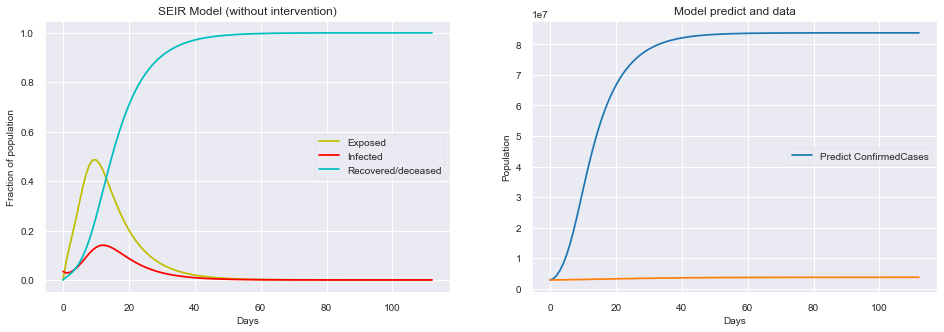

In [58]:
Country = 'Germany'
N = pop_info[pop_info['Name']==Country]['Population'].tolist()[0] # Germany Population 

# Load dataset of Germany
train_loc = train[train['Country_Region']==Country].query('ConfirmedCases > 0')
if len(train_loc)==0:
    train_loc = train[train['Province_State']==Country].query('ConfirmedCases > 0')

n_infected = train_loc['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
max_days = len(train_loc)# how many days want to predict

# Initial stat for SEIR model
s = (N - n_infected)/ N
e = 0.
i = n_infected / N
r = 0.

# Define all variable of SEIR model 
T_inc = 8.5  # average incubation period
T_inf = 2.7 # average infectious period
R_0 = 7.954 # reproduction number

## Solve the SEIR model 
sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(R_0, T_inf, T_inc), 
                t_eval=np.arange(max_days))

## Plot result
plot_model_and_predict(train_loc, N, sol, title = 'SEIR Model (without intervention)')

### Model with intervention
* There are different way to reduce R_t, [Differnt decay function](https://github.com/SwissTPH/openmalaria/wiki/ModelDecayFunctions) as below, we are using hill function
![image](https://raw.githubusercontent.com/wiki/SwissTPH/openmalaria/img/graphs/decay-functions.png)
This could be modified to take any function of `R_t(t)` values to model the reproduction number as a time varying variable
* Result shows the predict value greate fit the current comfirmedcases

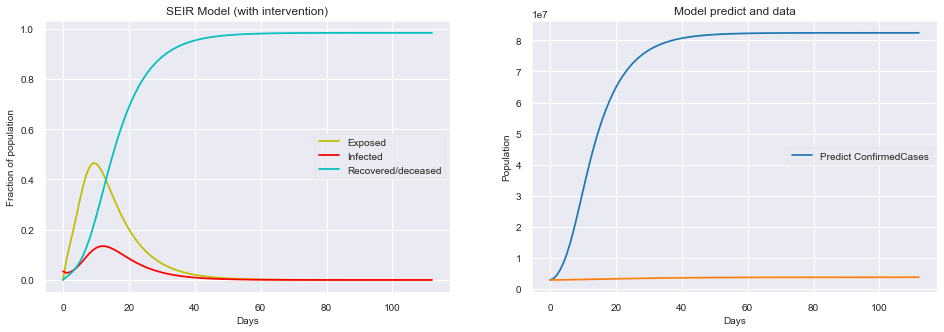

In [59]:
# Define all variable of SEIR model 
T_inc = 8.5  # average incubation period
T_inf = 2.7  # average infectious period

# Define the intervention parameters (fit result, latter will show how to fit)
R_0, cfr, k, L=[ 7.95469597 , 0.04593316 , 3.      ,   15.32328881]

def time_varying_reproduction(t): 
    return R_0 / (1 + (t/L)**k)

sol2 = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(time_varying_reproduction, T_inf, T_inc), 
                t_eval=np.arange(max_days))

plot_model_and_predict(train_loc, N, sol2, title = 'SEIR Model (with intervention)')

## Fit the SEIR model to real data
Find the best variables of SEIR model to fit the real data
* T_inf ==> Using average value 2.7 
* T_inc ==> Using average value 8.5
* **R_t** ==> find the best reproduction number by fitting the real data (if have decay function, find the paramater of decay function)
* **cfr** ==> find the best Case fatality rate, this parater is for predict Fatalities

In [60]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error, mean_squared_error

### Cumsum signal
* to prevent fluctuation

In [61]:
def cumsum_signal(vec):
    temp_val = 0
    vec_new = []
    for i in vec:
        if i > temp_val:
            vec_new.append(i)
            temp_val = i
        else:
            vec_new.append(temp_val)
    return vec_new

### Intervention by after days for SEIR model
* after days, start interverntion, R0 = R0 * 0.5

In [62]:
# Use a constant reproduction number
def eval_model_const(params, data, population, return_solution=False, forecast_days=0):
    R_0, cfr = params # Paramaters, R0 and cfr 
    N = population # Population of each country
    n_infected = data['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
    max_days = len(data) + forecast_days # How many days want to predict
    s, e, i, r = (N - n_infected)/ N, 0, n_infected / N, 0 #Initial stat for SEIR model
    
    # R0 become half after intervention days
    def time_varying_reproduction(t):
        if t > 80: # we set intervention days = 80
            return R_0 * 0.5
        else:
            return R_0
    
    # Solve the SEIR differential equation.
    sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(time_varying_reproduction, T_inf, T_inc),
                    t_eval=np.arange(0, max_days))
    
    sus, exp, inf, rec = sol.y
    # Predict confirmedcase
    y_pred_cases = np.clip((inf + rec) * N ,0,np.inf)
    y_true_cases = data['ConfirmedCases'].values
    
    # Predict Fatalities by remove * fatality rate(cfr)
    y_pred_fat = np.clip(rec*N* cfr, 0, np.inf)
    y_true_fat = data['Fatalities'].values
    
    optim_days = min(20, len(data))  # Days to optimise for
    weights = 1 / np.arange(1, optim_days+1)[::-1]  # Recent data is more heavily weighted
    
    # using mean squre log error to evaluate
    msle_cases = mean_squared_log_error(y_true_cases[-optim_days:], y_pred_cases[-optim_days:], weights)
    msle_fat = mean_squared_log_error(y_true_fat[-optim_days:], y_pred_fat[-optim_days:], weights)
    msle_final = np.mean([msle_cases, msle_fat])
    
    if return_solution:
        return msle_final, sol
    else:
        return msle_final

### Intervention by Hill function for SEIR model
* https://github.com/SwissTPH/openmalaria/wiki/ModelDecayFunctions

In [63]:
# Use a Hill decayed reproduction number
def eval_model_decay(params, data, population, return_solution=False, forecast_days=0):
    R_0, cfr, k, L = params # Paramaters, R0 and cfr 
    N = population # Population of each country
    n_infected = data['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
    max_days = len(data) + forecast_days # How many days want to predict
    s, e, i, r = (N - n_infected)/ N, 0, n_infected / N, 0 #Initial stat for SEIR model
    
    # https://github.com/SwissTPH/openmalaria/wiki/ModelDecayFunctions   
    # Hill decay. Initial values: R_0=2.2, k=2, L=50
    def time_varying_reproduction(t): 
        return R_0 / (1 + (t/L)**k)
    
    # Solve the SEIR differential equation.
    sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(time_varying_reproduction, T_inf, T_inc),
                    t_eval=np.arange(0, max_days))
    
    sus, exp, inf, rec = sol.y
    # Predict confirmedcase
    y_pred_cases = np.clip((inf + rec) * N ,0,np.inf)
    y_true_cases = data['ConfirmedCases'].values
    
    # Predict Fatalities by remove * fatality rate(cfr)
    y_pred_fat = np.clip(rec*N* cfr, 0, np.inf)
    y_true_fat = data['Fatalities'].values
    
    optim_days = min(20, len(data))  # Days to optimise for
    weights = 1 / np.arange(1, optim_days+1)[::-1]  # Recent data is more heavily weighted
    
    # using mean squre log error to evaluate
    msle_cases = mean_squared_log_error(y_true_cases[-optim_days:], y_pred_cases[-optim_days:], weights)
    msle_fat = mean_squared_log_error(y_true_fat[-optim_days:], y_pred_fat[-optim_days:], weights)
    msle_final = np.mean([msle_cases, msle_fat])
    
    if return_solution:
        return msle_final, sol
    else:
        return msle_final

### Function of Fit the SEIR model to real data
* Auto choose the best decay function of R_t (intervention days decay or Hill decay)
* Total case/country population is below 1, reduce country population
* If datset still no case, return 0 
* Plot the fit result and forecast trends (Infect smooth decrease by what date)
* Function being hide, there are describe in code.

In [64]:
from matplotlib import dates
import plotly.graph_objects as go

def fit_model_new(data, area_name, initial_guess=[2.2, 0.02, 2, 50], 
              bounds=((1, 20), (0, 0.15), (1, 3), (1, 100)), make_plot=True, decay_mode = None):
    
    if area_name in ['France']:# France last data looks weird, remove it
        train = data.query('ConfirmedCases > 0').copy()[:-1]
    else:
        train = data.query('ConfirmedCases > 0').copy()
    
    ####### Split Train & Valid #######
    valid_data = train[-7:].copy()
    train_data = train[:-7].copy()
    
    ####### If this country have no ConfirmedCase, return 0 #######
    if len(train_data) == 0:
        result_zero = np.zeros((43))
        return pd.DataFrame({'ConfirmedCases':result_zero,'Fatalities':result_zero}), 0 
    
    ####### Load the population of area #######
    try:
        #population = province_lookup[area_name]
        population = pop_info[pop_info['Name']==area_name]['Population'].tolist()[0]
    except IndexError:
        print ('country not in population set, '+str(area_name))
        population = 1000000 
    
    
    if area_name == 'US':
        population = 327200000
        
    if area_name == 'Global':
        population = 7744240900
        
    cases_per_million = train_data['ConfirmedCases'].max() * 10**6 / population
    n_infected = train_data['ConfirmedCases'].iloc[0]
    
    ####### Total case/popuplation below 1, reduce country population #######
    if cases_per_million < 1:
        #print ('reduce pop divide by 100')
        population = population/100
        
    ####### Fit the real data by minimize the MSLE #######
    res_const = minimize(eval_model_const, [2.2, 0.02], bounds=((1, 20), (0, 0.15)),
                         args=(train_data, population, False),
                         method='L-BFGS-B')

    res_decay = minimize(eval_model_decay, initial_guess, bounds=bounds,
                         args=(train_data, population, False),
                         method='L-BFGS-B')
    
    ####### Align the date information #######
    test_end = datetime.datetime.strptime('2021-07-22','%Y-%m-%d')
    test_start = datetime.datetime.strptime('2021-05-11','%Y-%m-%d')
    test_period = (test_end - test_start).days
    train_max = train_data.Date_datetime.max()
    train_all_max = train.Date_datetime.max()
    train_min = train_data.Date_datetime.min()
    add_date = 0
    delta_days =(test_end - train_max).days
    train_add_time=[]

    if train_min > test_start:
        add_date = (train_min-test_start).days
        last = train_min-timedelta(add_date)
        train_add_time = np.arange(last, train_min, dtype='datetime64[D]').tolist()
        train_add_time = pd.to_datetime(train_add_time)
        dates_all = train_add_time.append(pd.to_datetime(np.arange(train_min, test_end+timedelta(1), dtype='datetime64[D]')))
    else:
        dates_all = pd.to_datetime(np.arange(train_min, test_end+timedelta(1), dtype='datetime64[D]'))


    ####### Auto find the best decay function ####### 
    if decay_mode is None:
        if res_const.fun < res_decay.fun :
            msle, sol = eval_model_const(res_const.x, train_data, population, True, delta_days+add_date)
            res = res_const

        else:
            msle, sol = eval_model_decay(res_decay.x, train_data, population, True, delta_days+add_date)
            res = res_decay
            R_0, cfr, k, L = res.x
    else:
        if decay_mode =='day_decay':
            msle, sol = eval_model_const(res_const.x, train_data, population, True, delta_days+add_date)
            res = res_const
        else:
            msle, sol = eval_model_decay(res_decay.x, train_data, population, True, delta_days+add_date)
            res = res_decay
            R_0, cfr, k, L = res.x

    ####### Predict the result by using best fit paramater of SEIR model ####### 
    sus, exp, inf, rec = sol.y
    
    y_pred = pd.DataFrame({
       # 'ConfirmedCases': cumsum_signal(np.diff((inf + rec) * population, prepend=n_infected).cumsum()),
       'ConfirmedCases': [inf[0]*population for i in range(add_date)]+(np.clip((inf + rec) * population,0,np.inf)).tolist(),
       'Fatalities': [rec[0]*population for i in range(add_date)]+(np.clip(rec, 0, np.inf) * population * res.x[1]).tolist()
        #'Fatalities': cumsum_signal((np.clip(rec * population * res.x[1], 0, np.inf)).tolist())
    })

    y_pred_valid = y_pred.iloc[len(train_data)-1:len(train_data)+len(valid_data)]
    #y_pred_valid = y_pred.iloc[:len(train_data)]
    y_pred_test = y_pred.iloc[-(test_period+1):]
    #y_true_valid = train_data[['ConfirmedCases', 'Fatalities']]
    y_true_valid = valid_data[['ConfirmedCases', 'Fatalities']]
    #print (len(y_pred),train_min)
    #print (y_true_valid['ConfirmedCases'])
    #print (y_pred_valid['ConfirmedCases'])
    ####### Calculate MSLE ####### 
    valid_msle_cases = mean_squared_log_error(y_true_valid['ConfirmedCases'], y_pred_valid['ConfirmedCases'])
    valid_msle_fat = mean_squared_log_error(y_true_valid['Fatalities'], y_pred_valid['Fatalities'])
    valid_msle = np.mean([valid_msle_cases, valid_msle_fat])
    
    ####### Plot the fit result of train data and forecast after 90 days ####### 
    if make_plot:
        if len(res.x)<=2:
            print(f'Validation MSLE: {valid_msle:0.5f}, using intervention days decay, Reproduction number(R0) : {res.x[0]:0.5f}, Fatal rate : {res.x[1]:0.5f}')
        else:
            print(f'Validation MSLE: {valid_msle:0.5f}, using Hill decay, Reproduction number(R0) : {res.x[0]:0.5f}, Fatal rate : {res.x[1]:0.5f}, K : {res.x[2]:0.5f}, L: {res.x[3]:0.5f}')
        
        ####### Plot the fit result of train data dna SEIR model trends #######

        f = plt.figure(figsize=(16,5))
        ax = f.add_subplot(1,2,1)
        ax.plot(exp, 'y', label='Exposed');
        ax.plot(inf, 'r', label='Infected');
        ax.plot(rec, 'c', label='Recovered/deceased');
        plt.title('SEIR Model Trends')
        plt.xlabel("Days", fontsize=10);
        plt.ylabel("Fraction of population", fontsize=10);
        plt.legend(loc='best');
        #train_date_remove_year = train_data['Date_datetime'].apply(lambda date:'{:%m-%d}'.format(date))
        ax2 = f.add_subplot(1,2,2)
        xaxis = train_data['Date_datetime'].tolist()
        xaxis = dates.date2num(xaxis)
        hfmt = dates.DateFormatter('%m\n%d')
        ax2.xaxis.set_major_formatter(hfmt)
        ax2.plot(np.array(train_data['Date_datetime'], dtype='datetime64[D]'),train_data['ConfirmedCases'],label='Confirmed Cases (train)', c='g')
        ax2.plot(np.array(train_data['Date_datetime'], dtype='datetime64[D]'), y_pred['ConfirmedCases'][:len(train_data)],label='Cumulative modeled infections', c='r')
        ax2.plot(np.array(valid_data['Date_datetime'], dtype='datetime64[D]'), y_true_valid['ConfirmedCases'],label='Confirmed Cases (valid)', c='b')
        ax2.plot(np.array(valid_data['Date_datetime'], dtype='datetime64[D]'),y_pred_valid['ConfirmedCases'],label='Cumulative modeled infections (valid)', c='y')
        plt.title('Real ConfirmedCase and Predict ConfirmedCase')
        plt.legend(loc='best');
        plt.show()
            
        ####### Forecast 90 days after by using the best paramater of train data #######
        if len(res.x)>2:
            msle, sol = eval_model_decay(res.x, train_data, population, True, 90)
        else:
            msle, sol = eval_model_const(res.x, train_data, population, True, 90)
        
        sus, exp, inf, rec = sol.y
        
        y_pred = pd.DataFrame({
#             'ConfirmedCases': cumsum_signal(np.diff((inf + rec) * population, prepend=n_infected).cumsum()),
#             'Fatalities': cumsum_signal(np.clip(rec, 0, np.inf) * population * res.x[1])
       'ConfirmedCases': [inf[0]*population for i in range(add_date)]+(np.clip((inf + rec) * population,0,np.inf)).tolist(),
       'Fatalities': [rec[0]*population for i in range(add_date)]+(np.clip(rec, 0, np.inf) * population * res.x[1]).tolist()

        })
        
        ####### Plot 90 days after of each country #######
        start = train_min
        end = start + timedelta(len(y_pred))
        time_array = np.arange(start, end, dtype='datetime64[D]')

        max_day = numpy.where(inf == numpy.amax(inf))[0][0]
        where_time = time_array[max_day]
        pred_max_day = y_pred['ConfirmedCases'][max_day]
        xy_show_max_estimation = (where_time, max_day)
        
        con = y_pred['ConfirmedCases']
        max_day_con = numpy.where(con == numpy.amax(con))[0][0] # Find the max confimed case of each country
        max_con = numpy.amax(con)
        where_time_con = time_array[len(time_array)-50]
        xy_show_max_estimation_confirmed = (where_time_con, max_con)
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=time_array, y=y_pred['ConfirmedCases'].astype(int),
                            mode='lines',
                            line = dict(color='red'),
                            name='Estimation Confirmed Case Start from '+ str(start.date())+ ' to ' +str(end.date())))
        
        fig.add_trace(go.Scatter(x=time_array[:len(train)], y=train['ConfirmedCases'],
                            mode='lines',
                            name='Confirmed case until '+ str(train_all_max.date()),line = dict(color='green', width=4)))
        fig.add_annotation(
            x=where_time_con,
            y=max_con-(max_con/30),
            showarrow=False,
            text="Estimate Max Case around:" +str(int(max_con)),
            font=dict(
                color="Blue",
                size=15
            ))
        fig.add_annotation(
            x=time_array[len(train)-1],
            y=train['ConfirmedCases'].tolist()[-1],
            showarrow=True,
            text=f"Real Max ConfirmedCase: " +str(int(train['ConfirmedCases'].tolist()[-1]))) 
        
        fig.add_annotation(
            x=where_time,
            y=pred_max_day,
            text='Infect start decrease from: ' + str(where_time))   
        fig.update_layout(title='Estimate Confirmed Case ,'+area_name+' Total population ='+ str(int(population)), legend_orientation="h")
        fig.show()
        
#         df = pd.DataFrame({'Values': train_data['ConfirmedCases'].tolist()+y_pred['ConfirmedCases'].tolist(),'Date_datatime':time_array[:len(train_data)].tolist()+time_array.tolist(),
#                   'Real/Predict': ['ConfirmedCase' for i in range(len(train_data))]+['PredictCase' for i in range(len(y_pred))]})
#         fig = px.line(df, x="Date_datatime", y="Values",color = 'Real/Predict')
#         fig.show()
#         plt.figure(figsize = (16,7))
#         plt.plot(time_array[:len(train_data)],train_data['ConfirmedCases'],label='Confirmed case until '+ str(train_max.date()),color='g', linewidth=3.0)
#         plt.plot(time_array,y_pred['ConfirmedCases'],label='Estimation Confirmed Case Start from '+ str(start.date())+ ' to ' +str(end.date()),color='r', linewidth=1.0)
#         plt.annotate('Infect start decrease from: ' + str(where_time), xy=xy_show_max_estimation, size=15, color="black")
#         plt.annotate('max Confirmedcase: ' + str(int(max_con)), xy=xy_show_max_estimation_confirmed, size=15, color="black")
#         plt.title('Estimate Confirmed Case '+area_name+' Total population ='+ str(int(population)))
#         plt.legend(loc='lower right')
#         plt.show()


    return y_pred_test, valid_msle

## Let's fit SEIR model on Germany


Validation MSLE: 0.00016, using Hill decay, Reproduction number(R0) : 1.00000, Fatal rate : 0.02387, K : 3.00000, L: 1.00000


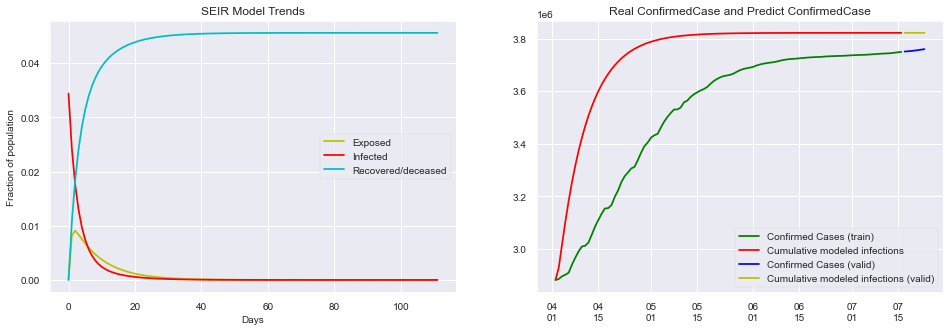

In [65]:
country = 'Germany'
if country not in train['Country_Region'].unique():
    country_pd_train = train[train['Province_State']==country]
else:
    country_pd_train = train[train['Country_Region']==country]

a,b = fit_model_new(country_pd_train,country,make_plot=True)